<a href="https://colab.research.google.com/github/THESHAMIK/Real-Life-Projects/blob/main/Pycaret/KHDS_Pycaret_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Core basic steps processed just to test water. No significance. R2 = 0.1584 for same dataset r2 = 0.40/0.36 in KHDS_Pycaret_6.

https://github.com/piyushpathak03/Automated-Machine-Learning/blob/master/pycaret/Kc_house%20by%20Pycaret.ipynb
https://github.com/piyushpathak03/Automated-Machine-Learning/blob/master/pycaret/Titanic%20through%20Pycaret.ipynb

In [ ]:
# Install pycaret library
!pip install pycaret

     |████████████████████████████████| 320 kB 9.6 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 2.0 MB 47.8 MB/s 
     |████████████████████████████████| 116 kB 61.5 MB/s 
     |████████████████████████████████| 1.7 MB 51.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 40.5 MB/s 
     |████████████████████████████████| 167 kB 49.6 MB/s 
     |████████████████████████████████| 1.3 MB 48.6 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 261 kB 39.1 MB/s 
     |████████████████████████████████| 6.8 MB 43.6 MB/s 
     |████████████████████████████████| 102 kB 13.4 MB/s 
     |████████████████████████████████| 10.9 MB 41.6 MB/s 
     |████████████████████████████████| 3.1 MB 48.4 MB/s 
     |████████████████

In [ ]:
import pandas as pd
# Initiallize the data and fuctioning : Once initialize press 'Y'
from pycaret.regression import *


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
# Load the data
data=pd.read_csv('khds_final_1.csv')
data.head()

,LABfeed Sulphur,T1 : FRESH FEED FLOW TO KHDS KGPerHour,T1 : Reactor inlet temperature DEGC,T1 : Hydrogen make-up flow NM3perHour,T1 : Recycle hydrogen flow NM3perHour,T1 : REACTOR OUTLET Temp DEGC,T1 : REACTOR FEED INLET Pressure KGperCM2,T1 : Cold separator pressure KGperCM2,T1 : KERO FEED DENSITY KGperCM2,T2 : FRESH FEED FLOW TO KHDS KGPerHour,T2 : Reactor inlet temperature DEGC,T2 : Hydrogen make-up flow NM3perHour,T2 : Recycle hydrogen flow NM3perHour,T2 : REACTOR OUTLET Temp DEGC,T2 : REACTOR FEED INLET Pressure KGperCM2,T2 : Cold separator pressure KGperCM2,T2 : KERO FEED DENSITY KGperCM2,T3 : FRESH FEED FLOW TO KHDS KGPerHour,T3 : Reactor inlet temperature DEGC,T3 : Hydrogen make-up flow NM3perHour,T3 : Recycle hydrogen flow NM3perHour,T3 : REACTOR OUTLET Temp DEGC,T3 : REACTOR FEED INLET Pressure KGperCM2,T3 : Cold separator pressure KGperCM2,T3 : KERO FEED DENSITY KGperCM2,T4 : FRESH FEED FLOW TO KHDS KGPerHour,T4 : Reactor inlet temperature DEGC,T4 : Hydrogen make-up flow NM3perHour,T4 : Recycle hydrogen flow NM3perHour,T4 : REACTOR OUTLET Temp DEGC,T4 : REACTOR FEED INLET Pressure KGperCM2,T4 : Cold separator pressure KGperCM2,T4 : KERO FEED DENSITY KGperCM2,Product Sulphur
0,1000.0,72482.43948,288.485914,685.146132,11114.58673,288.637635,21.927602,18.775248,0.0,72337.37151,287.651367,740.221182,11041.21585,288.761036,21.810156,18.688527,0.0,72376.86708,287.823835,660.058960,11072.44088,287.738775,21.813427,18.693064,0.0,72353.77432,287.978641,614.163076,11226.93106,288.712160,21.805388,18.666758,0.0,2
1,1400.0,75588.69117,286.406314,571.248477,11259.14433,286.921575,21.911739,18.702087,0.0,75746.39266,286.441067,549.330129,11228.98135,286.630241,21.870260,18.674408,0.0,75963.37102,286.687275,617.336266,11004.25626,286.128780,21.711249,18.533493,0.0,75918.19844,287.134693,464.921691,11066.97566,286.615329,21.934672,18.747208,0.0,0.5
2,1300.0,75675.29792,284.035734,564.716667,10668.45313,284.140627,21.900282,18.734029,0.0,75628.86875,284.037801,582.175509,10721.20293,284.517944,21.882274,18.724772,0.0,75646.63073,283.697494,559.376522,10763.02799,284.325244,21.813410,18.677979,0.0,76002.57969,284.800492,580.681543,10701.71289,284.840621,21.848295,18.704427,0.0,3
3,1500.0,46269.02109,276.210773,371.162782,14497.57829,276.808471,21.747162,19.528809,0.0,46001.59297,276.116185,527.354706,14646.65260,277.295914,21.531470,19.330088,0.0,46411.94089,275.763115,258.167509,14658.63428,277.148141,21.664635,19.450734,0.0,46176.64115,275.822623,565.165267,14783.88027,276.540142,21.547435,19.357554,0.0,4
4,1400.0,45394.43555,276.126803,296.835800,14606.11231,276.776767,21.560785,19.492783,0.0,45231.54465,276.010997,441.971037,14684.18629,276.807028,21.579045,19.508255,0.0,45301.01027,276.366341,365.445542,14693.11828,276.877170,21.526057,19.478851,0.0,45265.78914,276.090728,409.074912,14675.20297,277.132889,21.597432,19.496689,0.0,3


In [ ]:
#U can see last column Product Sulpur(Y) is an object & not Float
#data['Product Sulphur']=data['Product Sulphur'].astype(float64) ##==> # This is NOT working
data['Product Sulphur'] = pd.to_numeric(data['Product Sulphur'],errors = 'coerce') ##==> This one works as pd.to_numeric works for convert a list, a series, an array, or a tuple to a numeric datatype
#type(data['Product Sulphur']) ##This shows that Product Sulphur data type is a series hence astype did not work
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LABfeed Sulphur                            711 non-null    float64
 1   T1 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 2   T1 : Reactor inlet temperature DEGC        711 non-null    float64
 3   T1 : Hydrogen make-up flow NM3perHour      711 non-null    float64
 4   T1 : Recycle hydrogen flow NM3perHour      711 non-null    float64
 5   T1 : REACTOR OUTLET Temp DEGC              711 non-null    float64
 6   T1 : REACTOR FEED INLET Pressure KGperCM2  711 non-null    float64
 7   T1 : Cold separator pressure KGperCM2      711 non-null    float64
 8   T1 : KERO FEED DENSITY KGperCM2            711 non-null    float64
 9   T2 : FRESH FEED FLOW TO KHDS KGPerHour     711 non-null    float64
 10  T2 : Reactor inlet tempera

In [ ]:
clf1 = setup(data = data, target = 'Product Sulphur')

,Description,Value
0,session_id,7473
1,Target,Product Sulphur
2,Original Data,"(711, 34)"
3,Missing Values,True
4,Numeric Features,33
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(496, 12)"


In [ ]:
# Compare performance of the model through various regression model on various comparision metrics
from google.colab import data_table
data_table.enable_dataframe_formatter()
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.8664,20.3028,3.6702,0.1584,0.4363,0.5635,0.449
huber,Huber Regressor,1.8035,22.3175,3.9362,0.0646,0.4464,0.4452,0.083
ridge,Ridge Regression,2.0145,21.7601,3.9057,0.0543,0.4740,0.6241,0.032
omp,Orthogonal Matching Pursuit,2.0417,22.2778,3.9381,0.0539,0.4796,0.6483,0.022
lr,Linear Regression,2.0173,21.7697,3.9079,0.0525,0.4742,0.6259,0.507
lasso,Lasso Regression,2.0172,21.8944,3.9139,0.0516,0.4711,0.6175,0.030
en,Elastic Net,2.0171,21.8932,3.9144,0.0513,0.4707,0.6173,0.027
br,Bayesian Ridge,2.0262,22.0095,3.9214,0.0472,0.4730,0.6341,0.025
lightgbm,Light Gradient Boosting Machine,2.1699,21.6507,3.9192,-0.0172,0.4933,0.6648,0.088
par,Passive Aggressive Regressor,1.9935,23.1767,4.0632,-0.0214,0.4850,0.5402,0.024


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7473, verbose=0, warm_start=False)

In [ ]:
# Check the BEST one which is Extra Trees Regressor model's performance on 10 kfold CV 
lr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2901,2.8150,1.6778,0.5562,0.3704,0.5507
1,2.1215,14.9749,3.8697,-0.1110,0.5049,0.6557
2,2.8746,124.4758,11.1569,0.0632,0.5270,0.5404
3,2.0317,12.1385,3.4840,0.0197,0.4775,0.5863
4,1.7261,10.4131,3.2269,0.2260,0.4291,0.6013
5,1.3464,3.3047,1.8179,0.6453,0.3462,0.4866
6,1.9177,9.6087,3.0998,0.4659,0.4294,0.6373
7,1.4633,3.5387,1.8811,0.0989,0.3787,0.4924
8,2.0549,14.7563,3.8414,0.0644,0.4589,0.5293


In [ ]:
# Tune the Logistic regression model
tuned_lr = tune_model('lr')

In [ ]:
# Plot the model
plot_model('lr')

ValueError: ignored

In [ ]:
# ensembling Linear regression model (boosting)
lr_boosted = ensemble_model(lr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4181,3.3025,1.8173,0.4793,0.4042,0.6336
1,2.0309,14.1864,3.7665,-0.0525,0.4881,0.6369
2,3.0391,125.9876,11.2244,0.0518,0.5641,0.6687
3,2.2342,13.9471,3.7346,-0.1264,0.5117,0.6756
4,1.8510,10.6236,3.2594,0.2103,0.4509,0.6820
5,1.4453,3.7816,1.9446,0.5941,0.3814,0.5701
6,2.1669,10.9482,3.3088,0.3915,0.4661,0.7367
7,1.5566,3.7773,1.9435,0.0381,0.3979,0.5464
8,2.1509,15.9725,3.9966,-0.0127,0.4790,0.6199


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

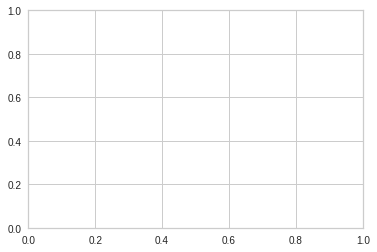

In [ ]:
# evaluate a model 
evaluate_model(lr_boosted)

In [ ]:
#optimize threshold for trained LR model
optimize_threshold(lr)

NameError: ignored

In [ ]:
# generate predictions on holdout
lr_predictions_holdout = predict_model(lr_boosted)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7433,11.7388,3.4262,0.1345,0.4222,0.5479


In [ ]:
# finalize model
lr_final = finalize_model(lr_boosted)

In [ ]:
# deploy model
deploy_model(model = lr_final, model_name = 'deploy_lr')

TypeError: ignored